<a href="https://colab.research.google.com/github/furibeguerra/PNL/blob/main/Desafio_2_Uribe_Guerra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">

# Deasafio 2
# Procesamiento de lenguaje natural
## Custom embedddings con Gensim



### Objetivo
El objetivo es utilizar documentos / corpus para crear embeddings de palabras basado en ese contexto. Se utilizará textos de literatura clasica para generar los embeddings, es decir, que los vectores tendrán la forma en función de como los autores hayan utilizado las palabras en sus libros.

Libros considerados para la prueba:

*   Baltasar Gracian - El Arte de la Prudencia
*   Lucio Anneo Seneca - De la Brevedad de la Vida (Libro utilizado para entrenar el modelo)
*   Friedrich Nietzsche - Asi Hablo Zaratustra
*   Nicolas Maquiavelo - El Principe








1- Fuente libros: https://www.textos.info/

2- Se han convertido de .pdf a .txt

3- Se encontraran en el repositorio para su revisión


In [1]:
!pip uninstall -y numpy
!pip install numpy

!pip uninstall -y gensim
!pip install gensim

from gensim.models import Word2Vec
print("Importación de Word2Vec exitosa")

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 59.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manyli

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import multiprocessing

In [3]:
from gensim.test.utils import common_texts

### Datos
Utilizaremos como dataset libros de literatura clasica

In [4]:
!apt-get install unzip


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [8]:
#Aca validare si cargue correctamente los libros:
import os
if os.path.exists('./librostxt'):
    print("La carpeta 'librostxt' existe.")
else:
    print("La carpeta 'librostxt' NO existe. Asegúrate de ejecutar la celda de descarga.")

La carpeta 'librostxt' existe.


In [9]:
import os
archivos_en_carpeta = os.listdir('./librostxt')
print("Archivos encontrados en 'librostxt':")
for archivo in archivos_en_carpeta:
    print(archivo)

Archivos encontrados en 'librostxt':
Friedrich Nietzsche - Asi Hablo Zaratustra.txt
Lucio Anneo Seneca - De la Brevedad de la Vida.txt
Baltasar Gracian - El Arte de la Prudencia.pdf.txt
Nicolas Maquiavelo - El Principe.txt


In [10]:
ruta_archivo = './librostxt/Lucio Anneo Seneca - De la Brevedad de la Vida.txt'  # Reemplaza 'libro1.txt' con el nombre de tu archivo
try:
    with open(ruta_archivo, 'r', encoding='utf-8') as archivo:
        contenido = archivo.read()
        print("Contenido de", ruta_archivo, ":")
        print(contenido[:200])  # Imprime los primeros 200 caracteres
except FileNotFoundError:
    print(f"El archivo '{ruta_archivo}' no fue encontrado.")
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")

Contenido de ./librostxt/Lucio Anneo Seneca - De la Brevedad de la Vida.txt :
De la Brevedad de la Vida
Lucio Anneo Séneca
textos.infoBiblioteca digital abierta
1Texto núm. 2004
Título: De la Brevedad de la Vida
Autor: Lucio Anneo Séneca
Etiquetas : Filosofía, Tratado
Editor: E


In [11]:
# Armar el dataset utilizando salto de línea para separar las oraciones/docs
df = pd.read_csv(ruta_archivo, sep='/n', header=None)
df.head()

<ipython-input-11-3655e240e345>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(ruta_archivo, sep='/n', header=None)


,0
0,De la Brevedad de la Vida
1,Lucio Anneo Séneca
2,textos.infoBiblioteca digital abierta
3,1Texto núm. 2004
4,Título: De la Brevedad de la Vida


# Desafio 2

1-Crear sus propios vectores con Gensim
basado en lo visto en clase con otro
dataset.

2-Probar términos de interés y explicar
similitudes en el espacio de embeddings.

3-Intentar plantear y probar tests de
analogías.

4-Graficar los embeddings
resultantes.

5-Sacar conclusiones.

In [12]:
print("Cantidad de documentos:", df.shape[0])

Cantidad de documentos: 795


In [13]:
!pip install tensorflow

# 1-Crear sus propios vectores con Gensim basado en lo visto en clase con otro dataset.

In [14]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

sentence_tokens = []
# Recorrer todas las filas y transformar las oraciones
# en una secuencia de palabras (esto podría realizarse con NLTK o spaCy también)
for _, row in df[:None].iterrows():
    sentence_tokens.append(text_to_word_sequence(row[0]))

In [15]:
# Demos un vistazo
sentence_tokens[:20]

[['de', 'la', 'brevedad', 'de', 'la', 'vida'],
 ['lucio', 'anneo', 'séneca'],
 ['textos', 'infobiblioteca', 'digital', 'abierta'],
 ['1texto', 'núm', '2004'],
 ['título', 'de', 'la', 'brevedad', 'de', 'la', 'vida'],
 ['autor', 'lucio', 'anneo', 'séneca'],
 ['etiquetas', 'filosofía', 'tratado'],
 ['editor', 'edu', 'robsy'],
 ['fecha', 'de', 'creación', '18', 'de', 'diciembre', 'de', '2016'],
 ['edita', 'textos', 'info'],
 ['maison', 'carrée'],
 ['c', 'ramal', '48'],
 ['07730', 'alayor', 'menorca'],
 ['islas', 'baleares'],
 ['españa'],
 ['más', 'textos', 'disponibles', 'en', 'http', 'www', 'textos', 'info'],
 ['2capítulo', 'i'],
 ['la',
  'mayor',
  'parte',
  'de',
  'los',
  'hombres',
  'oh',
  'paulino',
  'se',
  'queja',
  'de',
  'la',
  'naturaleza'],
 ['culpándola',
  'de',
  'que',
  'nos',
  'haya',
  'criado',
  'para',
  'edad',
  'tan',
  'corta',
  'y',
  'que',
  'el',
  'espacio'],
 ['que',
  'nos',
  'dio',
  'de',
  'vida',
  'corra',
  'tan',
  'veloz',
  'que',
  'vi

### Crear los vectores (word2vec)

In [16]:
from gensim.models.callbacks import CallbackAny2Vec
# Durante el entrenamiento gensim por defecto no informa el "loss" en cada época
# Sobrecargamos el callback para poder tener esta información
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

In [17]:
# Crearmos el modelo generador de vectores
# En este caso utilizaremos la estructura modelo Skipgram
w2v_model = Word2Vec(min_count=5,    # frecuencia mínima de palabra para incluirla en el vocabulario
                     window=2,       # cant de palabras antes y desp de la predicha
                     vector_size=300,       # dimensionalidad de los vectores
                     negative=20,    # cantidad de negative samples... 0 es no se usa
                     workers=1,      # si tienen más cores pueden cambiar este valor
                     sg=1)           # modelo 0:CBOW  1:skipgram

In [18]:
# Obtener el vocabulario con los tokens
w2v_model.build_vocab(sentence_tokens)

In [19]:
# Cantidad de filas/docs encontradas en el corpus
print("Cantidad de docs en el corpus:", w2v_model.corpus_count)

Cantidad de docs en el corpus: 795


In [20]:
# Cantidad de words encontradas en el corpus
print("Cantidad de words distintas en el corpus:", len(w2v_model.wv.index_to_key))

Cantidad de words distintas en el corpus: 248


### Entrenar embeddings

In [21]:
# Entrenamos el modelo generador de vectores
# Utilizamos nuestro callback
w2v_model.train(sentence_tokens,
                 total_examples=w2v_model.corpus_count,
                 epochs=20,
                 compute_loss = True,
                 callbacks=[callback()]
                 )

Loss after epoch 0: 60768.80078125
Loss after epoch 1: 26057.41796875
Loss after epoch 2: 24326.0
Loss after epoch 3: 23930.390625
Loss after epoch 4: 24768.921875
Loss after epoch 5: 24627.71875
Loss after epoch 6: 24775.84375
Loss after epoch 7: 24452.0
Loss after epoch 8: 24590.671875
Loss after epoch 9: 24351.609375
Loss after epoch 10: 24988.84375
Loss after epoch 11: 24572.84375
Loss after epoch 12: 23970.21875
Loss after epoch 13: 24288.6875
Loss after epoch 14: 24767.40625
Loss after epoch 15: 24241.625
Loss after epoch 16: 24180.1875
Loss after epoch 17: 23851.21875
Loss after epoch 18: 23592.34375
Loss after epoch 19: 24853.0


(60004, 187660)

### 2-Probar términos de interés y explicar similitudes en el espacio de embeddings.

In [23]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["vida"], topn=10)

[('vejez', 0.999113917350769),
 ('breve', 0.9990953207015991),
 ('mal', 0.9990900754928589),
 ('dar', 0.9990867972373962),
 ('sea', 0.9990723729133606),
 ('nuestra', 0.9990683794021606),
 ('corta', 0.9990324378013611),
 ('gusto', 0.999032199382782),
 ('misma', 0.9990314841270447),
 ('pérdida', 0.9990116953849792)]

In [24]:
# Palabras que MENOS se relacionan con...:
w2v_model.wv.most_similar(negative=["vida"], topn=10)

[('cosas', -0.9971705675125122),
 ('han', -0.9974320530891418),
 ('estas', -0.9974567294120789),
 ('otros', -0.9974973201751709),
 ('unos', -0.9975023865699768),
 ('está', -0.9975529313087463),
 ('de', -0.9976096749305725),
 ('vez', -0.9976731538772583),
 ('si', -0.9977012276649475),
 ('las', -0.9977174997329712)]

In [28]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["hombres"], topn=5)

[('vulgo', 0.9992077350616455),
 ('romano', 0.9991401433944702),
 ('sobre', 0.9991343021392822),
 ('muchos', 0.9991331100463867),
 ('manos', 0.9991292357444763)]

In [34]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["libre"], topn=5)

[('romano', 0.999423086643219),
 ('otras', 0.9994206428527832),
 ('¿cómo', 0.9994159936904907),
 ('uno', 0.9994088411331177),
 ('llegar', 0.9994004964828491)]

In [35]:
# Ensayar con una palabra que no está en el vocabulario:
try:
    similar_words = w2v_model.wv.most_similar(negative=["brevedad"])
    print(similar_words)
except KeyError as e:
    print(f"Error: La palabra '{e}' no se encuentra en el vocabulario del modelo.")

Error: La palabra '"Key 'brevedad' not present in vocabulary"' no se encuentra en el vocabulario del modelo.


In [36]:
# el método `get_vector` permite obtener los vectores:
vector_vida = w2v_model.wv.get_vector("vida")
print(vector_vida)

[ 0.04607484  0.15891594 -0.07905515  0.12954043 -0.00143408 -0.14785627
  0.01307955  0.25964928 -0.00127301 -0.11695616  0.0889689   0.00784675
  0.01867021  0.03859554 -0.12127544 -0.07109284  0.19901246 -0.02748338
  0.10494962 -0.05875413 -0.10451951 -0.17788072  0.11761447  0.07649034
  0.05018461 -0.08176091 -0.19992712 -0.05255841 -0.03240475 -0.06721435
  0.02716341 -0.00698661  0.05547379  0.01227477 -0.08470624  0.05214955
 -0.00865456 -0.0999334  -0.06689975 -0.02499848 -0.21863109  0.00688461
 -0.02091474 -0.05622769  0.08794671  0.11538836  0.00092988  0.08677021
  0.02601669  0.12696217  0.08693208  0.11554413 -0.01528086  0.08177671
 -0.00486503  0.08212093  0.07757346  0.01664074  0.01540456  0.04050845
 -0.05357763 -0.04226336  0.0332208   0.05710701 -0.12317393  0.08000323
 -0.00356421 -0.00387919 -0.08622797 -0.0315567  -0.05784247 -0.03958843
  0.01379029 -0.11788748  0.0413078  -0.00184941 -0.07148456  0.14945734
  0.02492264  0.05441426 -0.11053798 -0.11765645 -0

In [37]:
# el método `most_similar` también permite comparar a partir de vectores
w2v_model.wv.most_similar(vector_vida)

[('vida', 1.0),
 ('vejez', 0.999113917350769),
 ('breve', 0.9990953207015991),
 ('mal', 0.9990900754928589),
 ('dar', 0.9990869164466858),
 ('sea', 0.9990724325180054),
 ('nuestra', 0.9990683794021606),
 ('corta', 0.9990324378013611),
 ('gusto', 0.999032199382782),
 ('misma', 0.9990315437316895)]

In [38]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["vida"], topn=10)

[('vejez', 0.999113917350769),
 ('breve', 0.9990953207015991),
 ('mal', 0.9990900754928589),
 ('dar', 0.9990867972373962),
 ('sea', 0.9990723729133606),
 ('nuestra', 0.9990683794021606),
 ('corta', 0.9990324378013611),
 ('gusto', 0.999032199382782),
 ('misma', 0.9990314841270447),
 ('pérdida', 0.9990116953849792)]

# 3-Intentar plantear y probar tests de analogías.

In [39]:
# Probar analogías con Word2Vec
try:
    result = w2v_model.wv.most_similar(positive=["vida", "gusto"], negative=["mal"])
    print(result)
except KeyError as e:
    print(f"Error: La palabra '{e}' no se encuentra en el vocabulario del modelo.")


[('vejez', 0.9985979199409485), ('nuestra', 0.9985478520393372), ('breve', 0.9985440969467163), ('sea', 0.9985336661338806), ('dar', 0.9985302686691284), ('bien', 0.9984878897666931), ('tener', 0.9984816312789917), ('pérdida', 0.9984738826751709), ('no', 0.9984735250473022), ('toda', 0.9984560012817383)]


### Visualizar agrupación de vectores

In [40]:
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
import numpy as np

def reduce_dimensions(model, num_dimensions = 2 ):

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    return vectors, labels

# 4-Graficar los embeddings resultantes.

In [41]:
# Graficar los embedddings en 2D
import plotly.graph_objects as go
import plotly.express as px

vecs, labels = reduce_dimensions(w2v_model)

MAX_WORDS=200
fig = px.scatter(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], text=labels[:MAX_WORDS])
fig.show(renderer="colab") # esto para plotly en colab

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c1dec894220>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


In [42]:
# Graficar los embedddings en 3D

vecs, labels = reduce_dimensions(w2v_model,3)

fig = px.scatter_3d(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], z=vecs[:MAX_WORDS,2],text=labels[:MAX_WORDS])
fig.update_traces(marker_size = 2)
fig.show(renderer="colab") # esto para plotly en colab

In [43]:
# También se pueden guardar los vectores y labels como tsv para graficar en
# http://projector.tensorflow.org/


vectors = np.asarray(w2v_model.wv.vectors)
labels = list(w2v_model.wv.index_to_key)

np.savetxt("vectors.tsv", vectors, delimiter="\t")

with open("labels.tsv", "w") as fp:
    for item in labels:
        fp.write("%s\n" % item)

# 5-Sacar conclusiones.

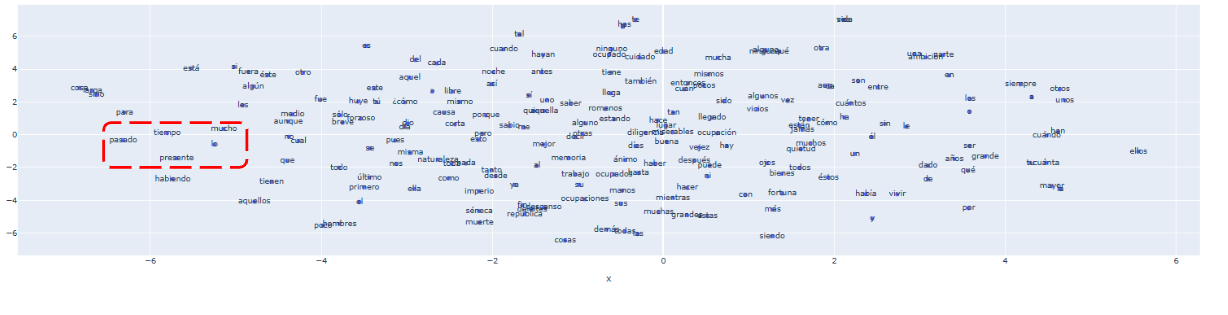

Al observar que palabras como "tiempo", "pasado", "presente" y "mucho" están en la misma zona del gráfico, podemos inferir que el modelo ha capturado correctamente las relaciones semánticas entre términos relacionados. Esto sugiere que el modelo ha agrupado palabras con significados similares o que frecuentemente aparecen en contextos cercanos en el texto, tales como cantidad y momento.

Es decir, que el texto presenta suficientes co-ocurrencias de estos términos para que el modelo los agrupe en el espacio de embeddings de manera coherente.